## Importing libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

## reading data

In [2]:
datasetx=pd.read_csv('./dataset/Logistic_X_Train.csv')
datasety=pd.read_csv('./dataset/Logistic_Y_Train.csv')

In [46]:
datasetx.head()

,f1,f2
0,0.574727,0.787277
1,0.251502,0.908940
2,1.860578,0.013763
3,0.019477,1.047210
4,0.029794,0.252236


In [47]:
datasety.head()

,label
0,0
1,0
2,1
3,0
4,1


- converting dataframe to numpy array

In [48]:
X_train=datasetx.values
Y_train=datasety.values

In [49]:
print(X_train.shape,Y_train.shape)

(2250, 2) (2250, 1)


## visualiasing data

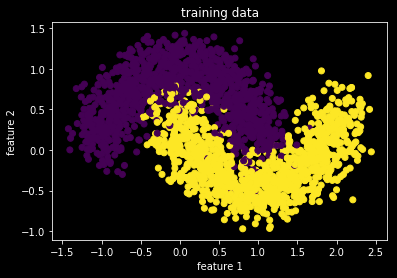

In [50]:
plt.style.use('dark_background')
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.flatten())
plt.title("training data")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

### Building model 

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [52]:
model=Sequential()

In [54]:
model.add(Flatten(input_shape=X_train[0].shape))
model.add(Dense(30,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 30)                90        
_________________________________________________________________
dense_13 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 41        
Total params: 1,371
Trainable params: 1,371
Non-trainable params: 0
_________________________________________________________________


- Compiling model

In [58]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

- training model

In [62]:
model.fit(X_train,Y_train,batch_size=10,epochs=40)

Train on 2250 samples
Epoch 1/40
2250/2250 [==============================] - 2s 877us/sample - loss: 0.3831 - accuracy: 0.8444
Epoch 2/40
2250/2250 [==============================] - 0s 135us/sample - loss: 0.2678 - accuracy: 0.8853
Epoch 3/40
2250/2250 [==============================] - 0s 132us/sample - loss: 0.2288 - accuracy: 0.9058
Epoch 4/40
2250/2250 [==============================] - 0s 135us/sample - loss: 0.1922 - accuracy: 0.9231
Epoch 5/40
2250/2250 [==============================] - 0s 130us/sample - loss: 0.1601 - accuracy: 0.9404
Epoch 6/40
2250/2250 [==============================] - 0s 134us/sample - loss: 0.1358 - accuracy: 0.9484
Epoch 7/40
2250/2250 [==============================] - 0s 133us/sample - loss: 0.1212 - accuracy: 0.9551
Epoch 8/40
2250/2250 [==============================] - 0s 135us/sample - loss: 0.1113 - accuracy: 0.9604
Epoch 9/40
2250/2250 [==============================] - 0s 134us/sample - loss: 0.1054 - accuracy: 0.9627
Epoch 10/40
2250/2250 [=

### reading test data

In [64]:
datasetx_test=pd.read_csv('./dataset/Logistic_X_Test.csv')

In [67]:
X_test=datasetx_test.values
X_test.shape

(750, 2)

- making prediction

In [72]:
Y_test=model.predict_classes(X_test)

### save numpy array to file

In [77]:
pd.DataFrame(Y_test).to_csv?

Object `to_csv` not found.


In [78]:
pd.DataFrame(Y_test).to_csv('./dataset/prediction_y_test.csv',header=['label'],index=False)